In [73]:
import json
import pandas as pd
from utils import load_option,dump_option
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [101]:
titles = load_option('titles')
stopwords = load_option('stopwords')
symbols = load_option('symbols')
print(symbols)
titles[:20]

!"#$%&()*+-./:;<=>?@[\]^_`{|}~



['cleaneval: a competition for cleaning web pages.',
 'leveraging legacy code to deploy desktop applications on the web',
 'face detection, recognition in an image sequence using eigenedginess.',
 'color displays for the color blind.',
 'a corpus-based synthesizer.',
 'keeyword search in databases.',
 'piqasso: pisa question answering system',
 'mobilizing the semantic web with daml-enabled web services',
 'search lessons learned from crossword puzzles',
 'improving the forward chaining algorithm for conceptual graphs rules',
 'adaptive localization in a dynamic wifi environment through multi-view learning',
 'learning to merge word senses',
 'fuzzy clustering of the self-organizing map: some applications on financial time series',
 'experiments with linear feature extraction in speech recognition.',
 'mapping requirements to software architecture by feature-orientation.',
 'modeling, simulation, and optimization of supply chains: a continuous approach',
 'maximized modality or constra

In [75]:
def remove_symbols(text):
    text = re.sub(r'[^\w]',' ',text)
    return re.sub(' +',' ',text).strip()

In [102]:
titles = list(map(remove_symbols,titles))

In [103]:
l = ['machine learning',
'deep learning',
'data mining',
'reinforcement learning']
l = [tuple(t.split(' ')) for t in l]
dump_option(l,'multiwords')
multiwords = load_option('multiwords')

In [104]:
from autocorrect import Speller
from tqdm import tqdm
spell = Speller(lang='en')


filted_titles = []
for title in tqdm(titles[:1000]):
    text = ' '.join([spell(word) for word in title.split(' ') if word not in stopwords])
    filted_titles.append(text)

100%|███████████████████████████████████████| 1000/1000 [00:33<00:00, 30.22it/s]


In [105]:
from nltk.tokenize import MWETokenizer
tokenizer = MWETokenizer(multiwords,separator='_')
titles = [' '.join(tokenizer.tokenize(title.split())) for title in titles]

In [139]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(titles[:1000])
feature_names = vectorizer.get_feature_names()
dense = vector.todense()
denselist = dense.tolist()


In [161]:
score = vector.reshape(-1,1000).sum(axis = 1)
df = pd.DataFrame(np.array(score),index = feature_names)

['plausible', 'repairs', 'inconsistent', 'requirements']
[0.522, 0.522, 0.493, 0.431]


<BarContainer object of 4 artists>

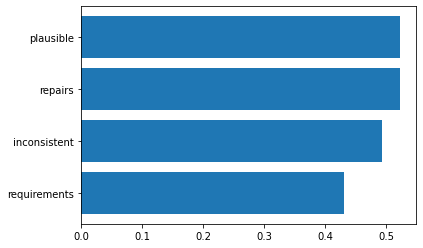

In [193]:
i = 20
text = tokenizer.tokenize(filted_titles[i].split())
indies = [feature_names.index(x) for x in text]
print(text)
score = [round(denselist[i][index],3) for index in indies]
print(score)
import matplotlib.pyplot as plt
plt.barh(text[::-1],score[::-1])